## 1.use knn

In [13]:
from sklearn.neighbors import KNeighborsClassifier
#创建一组数据 X 和它对应的标签 y
X=[[0],[1],[2],[3]]
y=[0,0,0,1]
#使用最近的3个邻居作为分类的依据
neigh = KNeighborsClassifier(n_neighbors=3)
#将训练数据 X 和 标签 y 送入分类器进行学习
neigh.fit(X, y)
#调用 predict() 函数，对未知分类样本 [1.1] 分类，可以直接并将需要分类
#的数据构造为数组形式作为参数传入，得到分类标签作为返回值
print(neigh.predict([[1.1]]))

[0]


## 2.use DecisionTree

In [17]:
#导入鸢尾花数据集、决策树分类器、计算交叉验证值的函数 cross_val_score
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
#使用默认参数，创建一颗基于基尼系数的决策树，并将该决策树分类器赋值给变量 clf
clf = DecisionTreeClassifier()
iris = load_iris()
'''
这里我们将决策树分类器做为待评估的模型，iris.data鸢尾花数据做为特征，
iris.target鸢尾花分类标签做为目标结果，通过设定cv为10，使用10折交叉验
证。得到最终的交叉验证得分。
'''
print(cross_val_score(clf, iris.data, iris.target, cv=10))

# clf.fit(X, y)
# clf.predict(x)


[ 1.          0.93333333  1.          0.93333333  0.93333333  0.86666667
  0.93333333  1.          1.          1.        ]


## 3. use naive bayes(Gaussian)

In [20]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
Y = np.array([1, 1, 1, 2, 2, 2])
#使用默认参数，创建一个高斯朴素贝叶斯分类器，并将该分类器赋给变量clf
clf = GaussianNB(priors=None)
clf.fit(X, Y)
print(clf.predict([[-0.8, -1]]))

[1]


## 4.人体运动状态预测

In [1]:
import pandas as pd
import numpy as np  

from sklearn.preprocessing import Imputer# 导入预处理模块Imputer
from sklearn.cross_validation import train_test_split #导入自动生成训练集和测试集的模块train_test_split
from sklearn.metrics import classification_report# 导入预测结果评估模块classification_report
#导入分类器
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
 
def load_datasets(feature_paths, label_paths):
    '''
    读取特征文件和标签文件并返回
    '''
    #定义feature数组变量，列数量和特征维度一致为41；定义空的标签变量，列数量与标签维度一致为1
    feature = np.ndarray(shape=(0,41))
    label = np.ndarray(shape=(0,1))
    for file in feature_paths:
        #使用pandas库的read_table函数读取一个特征文件的内容，其中指定分隔符为逗号、缺失值为问号且文件不包含表头行
        df = pd.read_table(file, delimiter=',', na_values='?', header=None)
        #使用Imputer函数，通过设定strategy参数为‘mean’，使用平均值对缺失数据进行补全。 
        imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
        #fit()函数用于训练预处理器，transform()函数用于生成预处理结果。
        imp.fit(df)
        df = imp.transform(df)
        #将预处理后的数据加入feature，依次遍历完所有特征文件
        feature = np.concatenate((feature, df))
    
    #读取标签文件
    for file in label_paths:
        df = pd.read_table(file, header=None)
        label = np.concatenate((label, df))
    #将标签归整化为一维向量    
    label = np.ravel(label)
    return feature, label
 
if __name__ == '__main__':
    ''' 数据路径 '''
    featurePaths = ['A/A.feature','B/B.feature','C/C.feature','D/D.feature','E/E.feature']
    labelPaths = ['A/A.label','B/B.label','C/C.label','D/D.label','E/E.label']
    
    ''' 读入数据  '''
    x_train,y_train = load_datasets(featurePaths[:4],labelPaths[:4])
    x_test,y_test = load_datasets(featurePaths[4:],labelPaths[4:])
    
    #使用train_test_split()函数，通过设置测试集比例test_size为0，将数据随机打乱，便于后续分类器的初始化和训练。
    x_train, x_, y_train, y_ = train_test_split(x_train, y_train, test_size = 0.0)
     
    print('Start training knn')
    knn = KNeighborsClassifier().fit(x_train, y_train)
    print('Training done')
    answer_knn = knn.predict(x_test)
    print('Prediction done')
     
    print('Start training DT')
    dt = DecisionTreeClassifier().fit(x_train, y_train)
    print('Training done')
    answer_dt = dt.predict(x_test)
    print('Prediction done')
     
    print('Start training Bayes')
    gnb = GaussianNB().fit(x_train, y_train)
    print('Training done')
    answer_gnb = gnb.predict(x_test)
    print('Prediction done')
     
    print('\n\nThe classification report for knn:')
    print(classification_report(y_test, answer_knn))
    print('\n\nThe classification report for DT:')
    print(classification_report(y_test, answer_dt))
    print('\n\nThe classification report for Bayes:')
    print(classification_report(y_test, answer_gnb))

E:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Start training knn
Training done
Prediction done
Start training DT
Training done
Prediction done
Start training Bayes
Training done
Prediction done


The classification report for knn:
             precision    recall  f1-score   support

        0.0       0.56      0.60      0.58    102341
        1.0       0.92      0.93      0.93     23699
        2.0       0.94      0.78      0.85     26864
        3.0       0.83      0.82      0.82     22132
        4.0       0.85      0.88      0.87     32033
        5.0       0.39      0.21      0.27     24646
        6.0       0.77      0.89      0.82     24577
        7.0       0.80      0.95      0.87     26271
       12.0       0.32      0.33      0.33     14281
       13.0       0.16      0.22      0.19     12727
       16.0       0.90      0.67      0.77     24445
       17.0       0.89      0.96      0.92     33034
       24.0       0.00      0.00      0.00      7733

avg / total       0.69      0.69      0.68    374783



The classificat

## 5.上证指数涨跌预测-实例分析

In [ ]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn import cross_validation
 
#pandas.read_csv（数据源, encoding=编码格式为utf-8， parse_dates=第0列解析为日期， index_col=用作行索引的列编号）
data=pd.read_csv('stock/000777.csv',encoding='utf-8',parse_dates=[0],index_col=0)
#DataFrame.sort_index(axis=0 (按0列排), ascending=True（升序）, inplace=False（排序后是否覆盖原数据））
#data 按照时间升序排列
data.sort_index(0,ascending=True,inplace=True)
 

dayfeature=150#选取150天的数据
featurenum=5*dayfeature#选取5列数据作为特征：收盘价 最高价 最低价 开盘价 成交量
sampleNum=data.shape[0]
'''
data.shape[0]-dayfeature意思是因为我们要用150天数据做训练，对于条目为200条的数据，只有50条数
据是有前150天的数据来训练的，所以训练集的大小就是200-150， 对于每一条数据，他的特征是前150
天的所有特征数据，即150*5， +1是将当天的开盘价引入作为一条特征数据
'''
x=np.zeros((sampleNum-dayfeature,featurenum+1))#记录150天的5个特征值
y=np.zeros((sampleNum-dayfeature))#记录涨或者跌

#对于特征数据
for i in range(0,sampleNum-dayfeature):
    #每条数据的特征为该数据前面的150天的所有特征数据+当天的开盘价
    x[i,0:featurenum]=np.array(data[i:i+dayfeature][['收盘价','最高价','最低价','开盘价','成交量']]).reshape((1,featurenum))#转换成行向量
    x[i,featurenum]=data.ix[i+dayfeature]['开盘价']
#对于标签数据
for i in range(0,sampleNum-dayfeature):
    #如果当天收盘价高于开盘价，y[i]=1代表涨，0代表跌
    if data.ix[i+dayfeature]['收盘价']>=data.ix[i+dayfeature]['开盘价']:
        y[i]=1
    else:
        y[i]=0          
 
 #调用svm函数，并设置kernel参数，默认是rbf，其它：‘linear’‘poly’‘sigmoid’
clf=svm.SVC(kernel='rbf')
result = []
#5次交叉验证
for i in range(5):
    #x和y的验证集和测试集，切分80-20%的测试集
    x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size = 0.2)
    #训练
    clf.fit(x_train, y_train)
    #训练集与预测结果进行对比
    result.append(np.mean(y_test == clf.predict(x_test)))
print("svm classifier accuacy:")
print(result)

## 6.房价与房屋尺寸关系的线性拟合

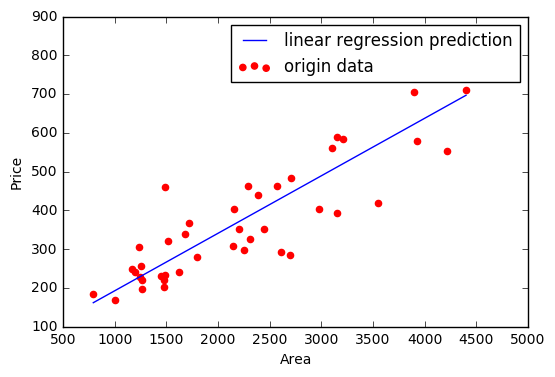

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
 
# 读取数据集
datasets_X = []#房屋面积
datasets_Y = []#房屋价格
fr = open('prices.txt','r')
lines = fr.readlines()
for line in lines:
    items = line.strip().split(',')
    datasets_X.append(int(items[0]))#注意加上类型转换
    datasets_Y.append(int(items[1]))
 

#将datasets_X转换为二维数组，以符合 linear.fit 函数的参数要求
datasets_X = np.array(datasets_X).reshape([-1,1])
datasets_Y = np.array(datasets_Y)
 
#以数据datasets_X的最大值和最小值为范围，建立等差数列，方便后续画图。
minX = min(datasets_X)
maxX = max(datasets_X)
X = np.arange(minX,maxX).reshape([-1,1])
 
 
linear = linear_model.LinearRegression()
linear.fit(datasets_X, datasets_Y)
 
# 图像中显示

plt.scatter(datasets_X, datasets_Y, color = 'red',label='origin data')
plt.plot(X, linear.predict(X), color = 'blue',label='linear regression prediction')
plt.legend()#使label生效
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

## 7.房价与房屋尺寸关系的非线性拟合

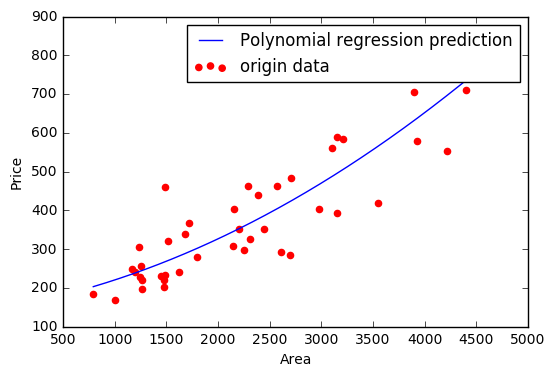

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
 
 
# 读取数据集
datasets_X = []
datasets_Y = []
fr = open('prices.txt','r')
lines = fr.readlines()
for line in lines:
    items = line.strip().split(',')
    datasets_X.append(int(items[0]))
    datasets_Y.append(int(items[1]))
 

datasets_X = np.array(datasets_X).reshape([-1,1])
datasets_Y = np.array(datasets_Y)
 
minX = min(datasets_X)
maxX = max(datasets_X)
X = np.arange(minX,maxX).reshape([-1,1])
 
 
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(datasets_X)
#使用线性模型学习X_poly和datasets_Y之间的映射关系（即参数）
lin_reg_2 = linear_model.LinearRegression()
lin_reg_2.fit(X_poly, datasets_Y)
 
# 图像中显示
plt.scatter(datasets_X, datasets_Y, color = 'red',label='origin data')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue',label='Polynomial regression prediction')
plt.legend()#使label生效
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

## 8.交通流量预测实例

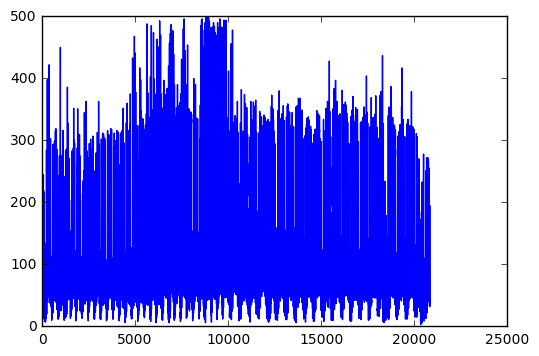

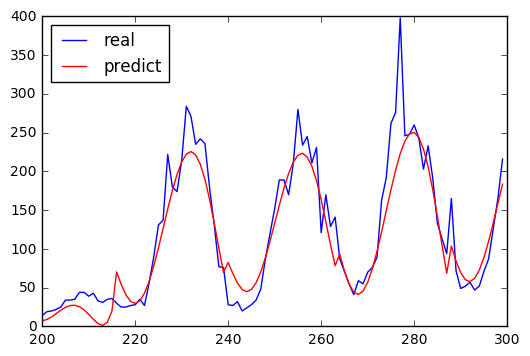

In [103]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge#加载岭回归方法
from sklearn import cross_validation
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures #用于创建多项式特征，如ab、 a2、 b2

data=pd.read_csv('traffic flow.csv')
#绘制车流量信息
plt.plot(data['TRAFFIC_COUNT'])
plt.show()

X=data[data.columns[1:5]]#属性数据
y=data['TRAFFIC_COUNT']#车流量数据（即是要预测的数据）
poly=PolynomialFeatures(5)
#X为创建的多项式特征
X=poly.fit_transform(X)
#将所有数据划分为训练集和测试集，test_size表示测试集的比例，random_state是随机数种子
train_set_X, test_set_X , train_set_y, test_set_y = cross_validation.train_test_split(X,y,test_size=0.3,random_state=0)
#创建岭回归实例
clf=Ridge(alpha=1.0,fit_intercept = True)
#调用fit函数使用训练集训练回归器
clf.fit(train_set_X,train_set_y)
#利用测试集计算回归曲线的拟合优度，clf.score返回值为0.7375
#拟合优度，用于评价拟合好坏，最大为1，无最小值，当对所有输入都输出同一个值时，拟合优度为0。
clf.score(test_set_X,test_set_y)

start=200 #接下来我们画一段200到300范围内的拟合曲线
end=300
y_pre=clf.predict(X) #是调用predict函数的拟合值
time=np.arange(start,end)
plt.plot(time,y[start:end],'b', label="real")
plt.plot(time,y_pre[start:end],'r', label='predict')
#展示真实数据（蓝色）以及拟合的曲线（红色）
plt.legend(loc='upper left') #设置图例的位置
plt.show()

## 9.1.利用全连接的神经网络实现手写识别的任务

In [104]:
import numpy as np     #导入numpy工具包
from os import listdir #使用listdir模块，用于访问本地文件
from sklearn.neural_network import MLPClassifier 
 
def img2vector(fileName):    
    '''将加载的32*32的图片矩阵展开成一列向量'''
    retMat = np.zeros([1024],int) #定义返回的矩阵，大小为1*1024
    fr = open(fileName)           #打开包含32*32大小的数字文件 
    lines = fr.readlines()        #读取文件的所有行
    for i in range(32):           #遍历文件所有行
        for j in range(32):       #并将01数字存放在retMat中     
            retMat[i*32+j] = lines[i][j]    
    return retMat
 
def readDataSet(path):    
    '''加载训练数据，并将样本标签转化为one-hot向量'''
    fileList = listdir(path)    #获取文件夹下的所有文件 
    numFiles = len(fileList)    #统计需要读取的文件的数目
    dataSet = np.zeros([numFiles,1024],int) #用于存放所有的数字文件
    hwLabels = np.zeros([numFiles,10])      #用于存放对应的one-hot标签
    for i in range(numFiles):   #遍历所有的文件
        filePath = fileList[i]  #获取文件名称/路径      
        digit = int(filePath.split('_')[0])  #通过文件名获取标签，注意类型转换      
        hwLabels[i][digit] = 1.0        #将对应的one-hot标签置1
        dataSet[i] = img2vector(path +'/'+filePath) #读取文件内容   
    return dataSet,hwLabels
 
#读取训练集
train_dataSet, train_hwLabels = readDataSet('digits/trainingDigits')
 
'''
构建神经网络：设置网络的隐藏层数、各隐藏层神经元个数、激活函数、学习率、优化方法、最大迭代次数。

设置含100个神经元的隐藏层,hidden_layer_sizes 存放的是一个元组，表示第i层隐藏层里神经元的个数
使用logistic激活函数和adam优化方法，并令初始学习率为0.0001，
'''
clf = MLPClassifier(hidden_layer_sizes=(100,),
                    activation='logistic', solver='adam',
                    learning_rate_init = 0.0001, max_iter=2000)
print(clf)
'''
fit函数能够根据训练集及对应标签集自动设置多层感知机的输入与输出层的神经元个数
例如train_dataSet为n*1024的矩阵，train_hwLabels为n*10的矩阵，则fit函数将MLP的输入层神经元个数设为1024，输出层神经元个数为10
'''

clf.fit(train_dataSet,train_hwLabels)
 
#读取测试集
dataSet,hwLabels = readDataSet('digits/testDigits')
res = clf.predict(dataSet)   #对测试集进行预测
error_num = 0                #统计预测错误的数目
num = len(dataSet)           #测试集的数目
for i in range(num):         #遍历预测结果
    #比较长度为10的数组，返回包含01的数组，0为不同，1为相同
    #若预测结果与真实结果相同，则10个数字全为1，否则不全为1
    if np.sum(res[i] == hwLabels[i]) < 10: 
        error_num += 1                     
print("Total num:",num," Wrong num:", \
      error_num,"  WrongRate:",error_num / float(num))

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.0001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
Total num: 946  Wrong num: 42   WrongRate: 0.04439746300211417


## 9.2.利用KNN实现手写识别的任务

In [126]:
import numpy as np     #导入numpy工具包
from os import listdir #使用listdir模块，用于访问本地文件
from sklearn import neighbors
 
def img2vector(fileName):    
    retMat = np.zeros([1024],int) #定义返回的矩阵，大小为1*1024
    fr = open(fileName)           #打开包含32*32大小的数字文件 
    lines = fr.readlines()        #读取文件的所有行
    for i in range(32):           #遍历文件所有行
        for j in range(32):       #并将01数字存放在retMat中     
            retMat[i*32+j] = lines[i][j]    
    return retMat
 
def readDataSet(path):    
    fileList = listdir(path)    #获取文件夹下的所有文件 
    numFiles = len(fileList)    #统计需要读取的文件的数目
    dataSet = np.zeros([numFiles,1024],int)    #用于存放所有的数字文件
    hwLabels = np.zeros([numFiles])#用于存放对应的标签(与神经网络的不同)
    for i in range(numFiles):      #遍历所有的文件
        filePath = fileList[i]     #获取文件名称/路径   
        digit = int(filePath.split('_')[0])   #通过文件名获取标签     
        hwLabels[i] = digit        #直接存放数字，并非one-hot向量
        dataSet[i] = img2vector(path +'/'+filePath)    #读取文件内容 
    return dataSet,hwLabels
 
#read dataSet
train_dataSet, train_hwLabels = readDataSet('digits/trainingDigits')
knn = neighbors.KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3)
knn.fit(train_dataSet, train_hwLabels)
 
#read  testing dataSet
dataSet,hwLabels = readDataSet('digits/testDigits')
 
res = knn.predict(dataSet)  #对测试集进行预测
error_num = np.sum(res != hwLabels) #统计分类错误的数目
num = len(dataSet)          #测试集的数目
print("Total num:",num," Wrong num:", \
      error_num,"  WrongRate:",error_num / float(num))

Total num: 946  Wrong num: 12   WrongRate: 0.0126849894292
